<a href="https://colab.research.google.com/github/Amritha07dec/MCN/blob/main/ODEST_PF_single_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Give the perturbation factors and the samples will be generated for a single system**

In [1]:
!git clone https://github.com/Amritha07dec/MCN.git
%cd MCN

Cloning into 'MCN'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 81 (delta 36), reused 18 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 32.98 MiB | 6.12 MiB/s, done.
Resolving deltas: 100% (36/36), done.
/content/MCN


# ODE simulator

## Importing dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import yaml

from scipy.integrate import solve_ivp




## Code for simulation with a generic ODE RHS

In [3]:
def simulate_ode_system(rhs_func, t_span, y0, params, solver='RK45', t_eval=None):
    """
    Simulate the ODE system.

    Parameters:
    - rhs_func: The right-hand side of the ODE as a function of (t, y, params).
    - t_span: Tuple (t_0, t_final), the time span for the simulation.
    - y0: Initial conditions as an array.
    - params: Parameters required by the rhs_func.
    - solver: The ODE solver method ('RK45', 'RK23', 'DOP853', 'LSODA', etc.).
    - t_eval: Array of time points at which to store the solution.

    Returns:
    - sol: Solution object containing times and states.
    """
    # Define the ODE system as a lambda function to pass the parameters
    def ode_func(t, y):
        return rhs_func(t, y, params)

    # Solve the ODE system
    sol = solve_ivp(ode_func, t_span, y0, method=solver, t_eval=t_eval)

    return sol


# Updated phase space plot function
def plot_phase_space(sol, state_indices=(0, 1, 2)):
    """
    Plots the phase space of the solution. Automatically switches to 3D if there are more than two states.

    Args:
    sol: Solution object from the ODE solver (such as the one returned by scipy's solve_ivp).
    state_indices: Tuple specifying which state variables to plot (default is (0, 1)).
                   For a 3D plot, pass 3 indices, for example (0, 1, 2).
    """
    y = sol.y
    num_states = y.shape[0]

    # 2D phase space
    if num_states == 2 or len(state_indices) ==2:
        plt.figure(figsize=(8, 6))
        plt.plot(y[state_indices[0]], y[state_indices[1]], lw=0.8)
        plt.xlabel(f"State {state_indices[0]}")
        plt.ylabel(f"State {state_indices[1]}")
        plt.title("2D Phase Space")
        plt.grid(True)
        plt.show()

    # 3D phase space if the system has more than two states
    elif len(state_indices) == 3 and num_states >= 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(y[state_indices[0]], y[state_indices[1]], y[state_indices[2]], lw=0.8)
        ax.set_xlabel(f"State {state_indices[0]}")
        ax.set_ylabel(f"State {state_indices[1]}")
        ax.set_zlabel(f"State {state_indices[2]}")
        ax.set_title("3D Phase Space")
        plt.show()

    else:
        print("State indices must be 2 or 3 for phase space plotting.")
def plot_trajectories(sol):
    """
    Plot the trajectories of all state variables over time.

    Parameters:
    - sol: Solution object from solve_ivp.
    """
    plt.figure(figsize=(8, 6))
    for i in range(sol.y.shape[0]):
        plt.plot(sol.t, sol.y[i], label=f'State {i}')
    plt.xlabel('Time')
    plt.ylabel('State Variables')
    plt.title('State Variables Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()




## Demo of simulating a system from the model dictionary

In [4]:
# importing models dictionary
from ode_models_dictionary import ode_systems


Simulating Quartic_Oscillator (Set 1) with perturbation factor 0.0
Parameters: [1.0, 0.5]
Initial conditions: [1.0, 0.0]
Expected behavior: cyclic


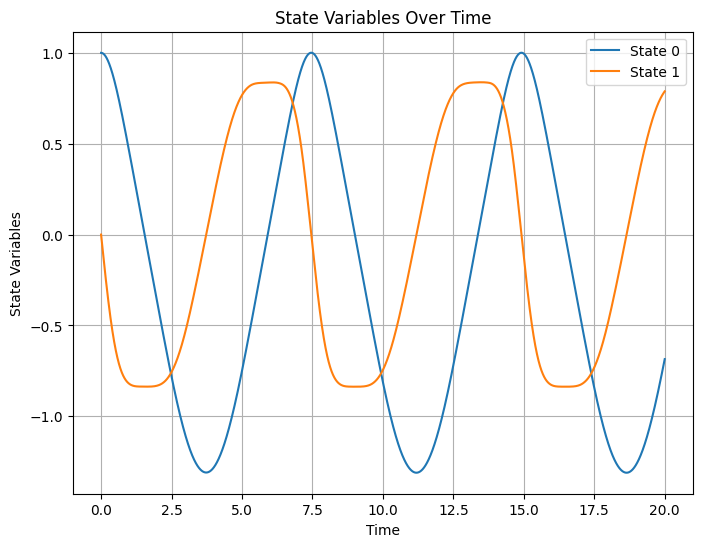

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-1.00_0.00.pkl

Simulating Quartic_Oscillator (Set 2) with perturbation factor 0.0
Parameters: [1.0, 1.0]
Initial conditions: [0.5, 0.0]
Expected behavior: complex


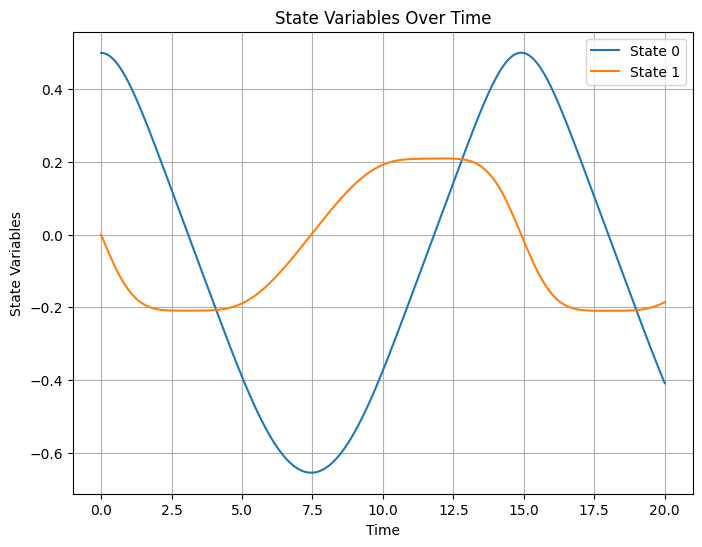

Pickle file saved at: pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.50_0.00.pkl

All saved pickle files:
pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-1.00_0.00.pkl
pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.50_0.00.pkl


In [5]:
# Example of how to access the rhs function and parameters_and_IC for the Lorenz system
#system_name = 'Damped_Oscilllator'
#system_name = 'Lorenz'                             #DCF=('Poly', 2, 0)
#system_name = 'Van_der_Pol'                        #DCF=('Poly', 3, 0)
#system_name = 'Lorenz96'                           #DCF=('Poly', 2, 0)
#system_name = 'Rossler'                            #DCF=('Poly', 2, 0)
#system_name = 'Linear_1D'                          #DCF=('Poly', 1, 0)
#system_name = 'Linear_2D_Harmonic_Oscillator'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_3D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_4D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Linear_5D_Coupled_Oscillators'      #DCF=('Poly', 1, 0)
#system_name = 'Duffing_Oscillator'                 #DCF=('Poly', 3, 0)
system_name = 'Quartic_Oscillator'                 #DCF=('Poly', 4, 0)
#system_name = 'Lotka_Volterra_Cubic'               #DCF=('Poly', 3, 0)

import os
import pickle
import glob
import numpy as np



# List of perturbation factors (you can modify this)
perturbation_factors = [0.0]  # Add or remove factors as needed

# Extract the specific system details
system_data = ode_systems[system_name]
rhs_func = system_data['rhs_function']
parameters_and_IC = system_data['parameters_and_IC']
degree = system_data['DCF_values']

# Folder to save pickle files
folder_name = "pickle_files"
os.makedirs(folder_name, exist_ok=True)

# Counter for generated samples
sample_count = 0

# Loop over each parameter & initial condition set
for idx, (params, initial_conditions, description) in enumerate(parameters_and_IC):
    for factor in perturbation_factors:
        # Perturb initial conditions
        perturbed_ic = [ic + factor * ic for ic in initial_conditions]

        print(f"\nSimulating {system_name} (Set {idx + 1}) with perturbation factor {factor}")
        print(f"Parameters: {params}")
        print(f"Initial conditions: {perturbed_ic}")
        print(f"Expected behavior: {description}")

        # Solve the system
        t_span = (0, 20)
        t_eval = np.linspace(t_span[0], t_span[1], 10000)
        sol = simulate_ode_system(rhs_func, t_span, perturbed_ic, params, solver='RK45', t_eval=t_eval)

        # Plot (optional)
        plot_trajectories(sol)

        # Save sample
        time_series_sample = {
            "Time series": sol,
            "degree": degree
        }

        # Construct filename
        degree_str = "_".join(map(str, degree))
        params_str = "_".join(map(str, params))
        ic_str = "_".join(f"{x:.2f}" for x in perturbed_ic)  # Keep decimals reasonable
        file_name = os.path.join(folder_name, f"{system_name}_Set-{idx + 1}_Deg-{degree_str}_Params-{params_str}_IC-{ic_str}.pkl")

        with open(file_name, "wb") as f:
            pickle.dump(time_series_sample, f)

        print(f"Pickle file saved at: {file_name}")
        sample_count += 1

# List all saved pickle files
pickle_files = glob.glob(f"{folder_name}/*.pkl")
print("\nAll saved pickle files:")
print("\n".join(pickle_files))







In [6]:
# Print file names
print("Saved pickle files:")
for file in pickle_files:
    print(file)
# Print total count of generated samples
print(f"\nTotal number of samples generated and saved: {sample_count}")

Saved pickle files:
pickle_files/Quartic_Oscillator_Set-1_Deg-Poly_4_0_Params-1.0_0.5_IC-1.00_0.00.pkl
pickle_files/Quartic_Oscillator_Set-2_Deg-Poly_4_0_Params-1.0_1.0_IC-0.50_0.00.pkl

Total number of samples generated and saved: 2
